### Тема: "Собственные числа, вектора, метод главных компонент"

In [1]:
from numpy import linalg as LA
import numpy as np
import pandas as pd

### Функция для получения собственных чисел и векторов

In [2]:
w, v = LA.eig(np.diag((4, 2, 3)))

In [3]:
w

array([4., 2., 3.])

In [4]:
v

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Собственные вектора и числа могут быть и комплексно-сопряженными друг к другу

In [5]:
 w, v = LA.eig(np.array([[1, -1], [1, 1]]))

In [6]:
w

array([1.+1.j, 1.-1.j])

In [7]:
v

array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        -0.70710678j, 0.        +0.70710678j]])

### Собственные вектора и числа могут быть вычислены и в матрице содержащей комплексный значения

In [8]:
a = np.array([[1, 1j], [-1j, 1]])

In [9]:
w, v = LA.eig(a)

In [10]:
w

array([2.+0.j, 0.+0.j])

In [11]:
v

array([[0.        +0.70710678j, 0.70710678+0.j        ],
       [0.70710678+0.j        , 0.        +0.70710678j]])

### Обращаю внимание на ошибку округления !

In [12]:
 a = np.array([[1 + 1e-9, 0], [0, 1 - 1e-9]])

In [13]:
a

array([[1., 0.],
       [0., 1.]])

In [14]:
w, v = LA.eig(a)

In [15]:
w

array([1., 1.])

In [16]:
v

array([[1., 0.],
       [0., 1.]])

### Для нахождения собственных чисел и векторов исходная матрица должна быть квадратной

In [17]:
 a = np.array([[1, 1, 1, 0],[1, 1, 0, 1],[1, 0, 1, 1],[0, 1, 1, 1]])

In [18]:
a

array([[1, 1, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1]])

In [19]:
w, v = LA.eig(a)

In [20]:
w

array([-1.,  1.,  3.,  1.])

In [21]:
v

array([[ 5.00000000e-01, -7.07106781e-01, -5.00000000e-01,
         0.00000000e+00],
       [-5.00000000e-01, -3.46944695e-17, -5.00000000e-01,
         7.07106781e-01],
       [-5.00000000e-01,  7.63278329e-17, -5.00000000e-01,
        -7.07106781e-01],
       [ 5.00000000e-01,  7.07106781e-01, -5.00000000e-01,
         2.22044605e-16]])

In [22]:
 a = np.array([[3, 1, 0, 3],[3, 1, 0, 2],[3, 0, 2, 1]])

In [23]:
a

array([[3, 1, 0, 3],
       [3, 1, 0, 2],
       [3, 0, 2, 1]])

In [24]:
w, v = LA.eig(a)

LinAlgError: Last 2 dimensions of the array must be square

Напишите функцию для нахождения собственных чисел и векторов для матрицы произвольной размерности заполненной случайными данными

### Кроме указанной функции существуют и другие

scipy.sparse.linalg.eigs(A, k=6, M=None, sigma=None, which='LM', v0=None, ncv=None, maxiter=None, tol=0, return_eigenvectors=True, Minv=None, OPinv=None, OPpart=None)

 scipy.linalg.eig(a, b=None, left=False, right=True, overwrite_a=False, overwrite_b=False, check_finite=True, homogeneous_eigvals=False)

numpy.linalg.eig(a)

# Сингулярное разложение

Линейный оператор, отображающий элементы пространства произвольной размерности в себя представим в виде последовательно выполняемых линейных операторов вращения и растяжения (сжатия). Поэтому компоненты сингулярного разложения наглядно показывают геометрические изменения при отображении линейным оператором множества векторов из векторного пространства в себя или в векторное пространство другой размерности

In [25]:
import numpy 
import matplotlib.pyplot as plt

In [26]:
numpy.linalg.svd?

In [27]:
### Посмотрим как изменяться наши точки при сингулярном разложении
a = np.array([[0.96, 1.72],[ 2.28, 0.96]]) 

In [28]:
a

array([[0.96, 1.72],
       [2.28, 0.96]])

In [29]:
u, s, vh = np.linalg.svd(a, full_matrices=True)

In [30]:
u

array([[-0.6, -0.8],
       [-0.8,  0.6]])

In [31]:
s

array([3., 1.])

In [32]:
vh

array([[-0.8, -0.6],
       [ 0.6, -0.8]])

In [33]:
u*s


array([[-1.8, -0.8],
       [-2.4,  0.6]])

In [34]:
u*s*vh

array([[ 1.44,  0.48],
       [-1.44, -0.48]])

In [35]:
a = np.random.randn(9, 6) + np.random.randn(9, 6)

In [36]:
a, a.shape

(array([[ 0.46193685,  1.93217759, -0.20500954, -0.61653269, -2.81080648,
          0.6868864 ],
        [ 0.48384159, -1.86879284,  0.53698888,  0.84034217, -1.82729084,
          3.07457687],
        [ 0.76320927, -0.26655245, -0.16685356,  0.71870042,  0.10980331,
          0.54716636],
        [ 0.84139462, -0.79469594, -0.06355082,  2.20578987, -0.21327945,
          0.70459549],
        [ 1.72121077,  0.90563085, -0.69728026, -1.13119678,  2.23640985,
         -1.54680777],
        [-0.30693712,  0.31135292, -2.71038214,  1.90452025, -0.60768014,
         -1.00305171],
        [-1.95581424,  2.01266191,  0.04407402, -0.23609381,  0.66539037,
          0.28885418],
        [-1.75357999, -0.90226676,  0.10770503,  0.43007293, -1.953895  ,
          2.3327563 ],
        [ 0.45518381,  1.62294418, -0.09842886, -0.19978019, -0.18648167,
          2.19827843]]), (9, 6))

In [37]:
u, s, vh = np.linalg.svd(a, full_matrices=True)

In [38]:
u.shape, s.shape, vh.shape # размерность матриц преобразования

((9, 9), (6,), (6, 6))

In [39]:
u

array([[ 0.22246044, -0.54605311,  0.2737145 ,  0.49941847, -0.47033623,
        -0.2272681 ,  0.14111185,  0.12957923, -0.1357521 ],
       [ 0.59817761,  0.23452596, -0.21396576,  0.21297186,  0.07798583,
         0.26444496,  0.60696613, -0.1880908 ,  0.12745114],
       [ 0.06451988,  0.16925145,  0.02309949,  0.21675334,  0.21945543,
        -0.06115684, -0.12718624, -0.34893079, -0.85431005],
       [ 0.18524813,  0.40932759,  0.17637178,  0.19683536,  0.33339164,
        -0.61567406,  0.00968858,  0.48095913,  0.08162597],
       [-0.49790065,  0.02715911, -0.11368587,  0.40663388,  0.16285462,
         0.42985749,  0.28097157,  0.50430242, -0.16886885],
       [-0.03381617,  0.19677752,  0.90270666,  0.00129109,  0.07374078,
         0.32520702,  0.05845529, -0.1398639 ,  0.10525134],
       [-0.07383482, -0.50680451,  0.12481909, -0.40609314,  0.48581215,
        -0.20396276,  0.50975066, -0.0040918 , -0.14046151],
       [ 0.52069515, -0.11374008,  0.04596845, -0.35482852,  0

In [40]:
s

array([6.52119019, 4.29985403, 3.766167  , 3.22318287, 2.49816389,
       1.31598148])

In [41]:
vh

array([[-0.14430247, -0.25422964,  0.11164912,  0.23414692, -0.60445534,
         0.69418119],
       [ 0.31179548, -0.76875536, -0.08517183,  0.47633562,  0.21718846,
        -0.17457974],
       [-0.16720079,  0.29069113, -0.67401539,  0.50568548, -0.32243916,
        -0.27122131],
       [ 0.91981028,  0.2730678 , -0.1301907 , -0.04156449, -0.17211969,
         0.17629696],
       [-0.06552378,  0.28836619, -0.10764644,  0.39008694,  0.66350994,
         0.55547327],
       [-0.0604976 , -0.3196249 , -0.7052986 , -0.55557751,  0.11672732,
         0.27284101]])

Кроме сингулярного разложения можно использовать и другие виды разложений например QR,LR и тп...

### Метод главных компонент

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *

Создадим матрицу случайных значений

In [43]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))

In [44]:
X

array([[ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
         6.        ,  7.        ,  8.        ,  9.        , 10.        ],
       [ 2.0038481 ,  4.64887112,  8.59896409,  7.05923631,  8.21588548,
        12.87592065, 13.87956061, 18.35624476, 19.91943987, 20.14051827]])

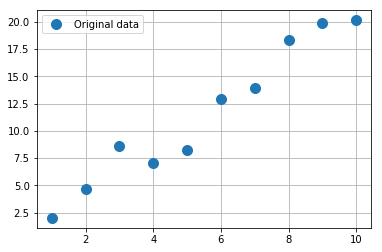

In [45]:
plt.plot(X[0,:], X[1,:], 'o', label='Original data', markersize=10)
plt.grid()
plt.legend()
plt.show()


Центрирование случайной величины

In [46]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean())
m = (x.mean(), y.mean())

In [47]:
Xcentered[0]

array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5])

In [48]:
Xcentered[1]

array([-9.56600083, -6.9209778 , -2.97088484, -4.51061261, -3.35396344,
        1.30607172,  2.30971169,  6.78639583,  8.34959094,  8.57066935])

In [49]:
m

(5.5, 11.56984892620025)

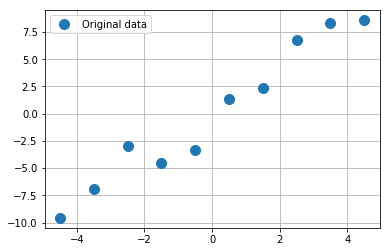

In [50]:
plt.plot(Xcentered[0], Xcentered[1], 'o', label='Original data', markersize=10)
plt.grid()
plt.legend()
plt.show()

 Найдем ковариационную матрицу

In [51]:
covmat = np.cov(Xcentered)

In [52]:
covmat

array([[ 9.16666667, 19.1128569 ],
       [19.1128569 , 41.78855123]])

Теперь надо найти такой вектор (в нашем случае только один), при котором максимизировался бы размер (дисперсия) проекции нашей выборки на него. 

In [53]:
eigenvalues, eigenvectors = np.linalg.eig(covmat)

In [54]:
eigenvectors

array([[-0.90806093, -0.41883809],
       [ 0.41883809, -0.90806093]])

Диагональные элементы ковариационной матрицы показывают дисперсии по изначальному базису, а ее собственные значения – по новому (по главным компонентам)

In [55]:
eigenvalues 

array([ 0.35096697, 50.60425092])


Часто требуется оценить объем потерянной (и сохраненной) информации. Удобнее всего представить в процентах. Мы берем наибольшее по величине значение собственного числа (максимальное значение дисперсии при переходе к новому базису) и делим на общую сумму изначальных дисперсий (т.е. сумму всех диагональных элементов ковариационной матрицы). Таким образом, наш больший вектор описывает 47.69176898 / (9.1666667+38.87245373) * 100% = 99.27%, а меньший - 0.73%. Отбросив меньший вектор и спроецировав данные на больший, мы потеряем меньше 1% информации! Отличный результат!

In [56]:
(eigenvalues [1])/(covmat[0,0]+covmat[1,1])*100


99.3112246693191

На практике, в большинстве случаев, если суммарная потеря информации составляет не более 10-20%, то можно спокойно снижать размерность.

Для большей наглядности инвертируем по направлению eigenvectors

In [57]:
eigenew = -eigenvectors[:,1]

In [58]:
eigenew

array([0.41883809, 0.90806093])

In [59]:
Xnew = dot(eigenvectors,Xcentered) # поэлементное произведение

In [60]:
Xnew

array([[ 8.0928797 ,  6.07698238,  3.51447206,  3.25130777,  1.85879811,
        -1.00106305, -2.32948663, -5.11255339, -6.67533998, -7.67599697],
       [ 6.80174022,  4.81873623,  1.65064923,  3.46765395,  2.83618412,
        -0.97657366, -1.46910181, -5.1153657 , -6.11600401, -5.89791858]])

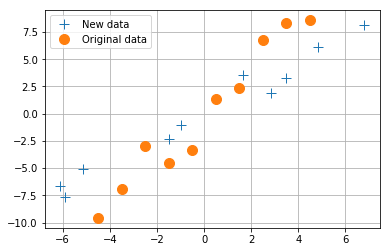

In [61]:
plt.plot(Xnew[1], Xnew[0], '+', label='New data', markersize=10)
plt.plot(Xcentered[0], Xcentered[1], 'o', label='Original data', markersize=10)
plt.grid()
plt.legend()
plt.show()

Проверка как работает алгоритм

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(transpose(X))

In [78]:
print ('Our reduced X: \n', Xnew[0,:])
print ('Sklearn reduced X: \n', XPCAreduced.T)

Our reduced X: 
 [ 8.0928797   6.07698238  3.51447206  3.25130777  1.85879811 -1.00106305
 -2.32948663 -5.11255339 -6.67533998 -7.67599697]
Sklearn reduced X: 
 [[10.57128302  7.75060286  3.74483968  4.72416822  3.25502221 -1.39541175
  -2.72561608 -7.20955614 -9.04787064 -9.66746139]]


In [79]:
pca?

Проверим и прочие параметры модели функция имеет ряд атрибутов, позволяющих получить доступ к промежуточным переменным:

- Вектор средних: mean_
- Вектор(матрица) проекции: components_
- Дисперсии осей проекции (выборочная): explained_variance_
- Доля информации (доля от общей дисперсии): explained_variance_ratio_

    Замечание: explained_variance_ показывает выборочную дисперсию, тогда как функция cov() для построения ковариационной матрицы рассчитывает несмещенные дисперсии!

In [80]:
print ('Mean vector: ', pca.mean_)
print ('Projection: ', pca.components_)

Mean vector:  [ 5.5        11.56984893]
Projection:  [[-0.41883809 -0.90806093]]


### Замечание: библиотечный метод автоматически проецирует на оси, максимизирующие дисперсию. Это не всегда рационально. К примеру, неаккуратное снижение размерности приведет к тому, что классификация станет невозможна. Тем не менее, проекция на меньший вектор успешно снизит размерность и сохранит классификатор.

## Методы оптимизации


На практике очень часто возникают задачи, для решения которых используются методы оптимизации. В обычной жизни при множественном выборе, например, подарков к новому году мы интуитивно решаем задачу минимальных затрат при заданном качестве покупок.

In [85]:
### решение задачи о рекламе с использованием pulp
from pulp import *
import time
start = time.time()
x1 = pulp.LpVariable("x1", lowBound=0)
x2 = pulp.LpVariable("x2", lowBound=0)
problem = pulp.LpProblem('0',pulp.LpMaximize)
problem += 30*x1 +x2, "Функция цели"
problem += 90*x1+ 5*x2 <= 10000, "1"
problem +=x2 ==3*x1, "2"
problem.solve()
print ("Результат:")
for variable in problem.variables():
    print (variable.name, "=", variable.varValue)
print ("Прибыль:")
print (value(problem.objective))
stop = time.time()
print ("Время :")
print(stop - start)

Результат:
x1 = 95.238095
x2 = 285.71429
Прибыль:
3142.85714
Время :
0.21874451637268066


Оптимизация с библиотекой cvxopt 

In [90]:
from cvxopt.modeling import variable, op
import time
start = time.time()
x = variable(2, 'x')
z=-(30*x[0] +1*x[1])#Функция цели
mass1 = (90*x[0] + 5*x[1]  <= 10000) #"1"
mass2 = (3*x[0] -x[1] == 0) # "2"
x_non_negative = (x >= 0) #"3"    
problem =op(z,[mass1,mass2,x_non_negative])
problem.solve(solver='glpk')  
problem.status
print ("Прибыль:")
print(abs(problem.objective.value()[0]))
print ("Результат:")
print(x.value)
stop = time.time()
print ("Время :")
print(stop - start)

ModuleNotFoundError: No module named 'cvxopt'

Оптимизация с библиотекой scipy. optimize

In [88]:
from scipy.optimize import linprog
import time
start = time.time()
c = [-30,-1] #Функция цели
A_ub = [[90,5]]  #'1'   
b_ub = [10000]#'1'   
A_eq = [[3,-1]] #'2'   
b_eq = [0] #'2'   
print (linprog(c, A_ub, b_ub, A_eq, b_eq))
stop = time.time()
print ("Время :")
print(stop - start)

     fun: -3142.857142857143
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0.])
  status: 0
 success: True
       x: array([ 95.23809524, 285.71428571])
Время :
0.08495497703552246


Оптимизация с библиотекой pulp для транспортной задачи.

In [89]:
from pulp import *
import time
start = time.time()
x1 = pulp.LpVariable("x1", lowBound=0)
x2 = pulp.LpVariable("x2", lowBound=0)
x3 = pulp.LpVariable("x3", lowBound=0)
x4 = pulp.LpVariable("x4", lowBound=0)
x5 = pulp.LpVariable("x5", lowBound=0)
x6 = pulp.LpVariable("x6", lowBound=0)
x7 = pulp.LpVariable("x7", lowBound=0)
x8 = pulp.LpVariable("x8", lowBound=0)
x9 = pulp.LpVariable("x9", lowBound=0)
problem = pulp.LpProblem('0',pulp.LpMaximize)
problem += -7*x1 - 3*x2 - 6* x3 - 4*x4 - 8*x5 -2* x6-1*x7- 5*x8-9* x9, "Функция цели"
problem +=x1 + x2 +x3<= 74,"1" 
problem +=x4 + x5 +x6 <= 40, "2"
problem +=x7 + x8+ x9 <= 36, "3"
problem +=x1+ x4+ x7 == 20, "4"
problem +=x2+x5+ x8 == 45, "5"
problem +=x3 + x6+x9 == 30, "6"                     
problem.solve()
print ("Результат:")
for variable in problem.variables():
    print (variable.name, "=", variable.varValue)
print ("Стоимость доставки:")
print (abs(value(problem.objective)))
stop = time.time()
print ("Время :")
print(stop - start)

Результат:
x1 = 0.0
x2 = 45.0
x3 = 0.0
x4 = 0.0
x5 = 0.0
x6 = 30.0
x7 = 20.0
x8 = 0.0
x9 = 0.0
Стоимость доставки:
215.0
Время :
0.5497896671295166


Оптимизация с библиотекой cvxopt.

In [91]:
rom cvxopt.modeling import variable, op
import time
start = time.time()
x = variable(9, 'x')
z=(7*x[0] + 3*x[1] +6* x[2] +4*x[3] + 8*x[4] +2* x[5]+x[6] + 5*x[7] +9* x[8])
mass1 = (x[0] + x[1] +x[2] <= 74)
mass2 = (x[3] + x[4] +x[5] <= 40)
mass3 = (x[6] + x[7] + x[8] <= 36)
mass4 = (x[0] + x[3] + x[6] == 20)
mass5 = (x[1] +x[4] + x[7] == 45)
mass6 = (x[2] + x[5] + x[8] == 30)
x_non_negative = (x >= 0)    
problem =op(z,[mass1,mass2,mass3,mass4 ,mass5,mass6, x_non_negative])
problem.solve(solver='glpk')  
problem.status
print("Результат:")
print(x.value)
print("Стоимость доставки:")
print(problem.objective.value()[0])
stop = time.time()
print ("Время :")
print(stop - start)

SyntaxError: invalid syntax (<ipython-input-91-4c214d668a07>, line 1)

Оптимизация с библиотекой scipy. optimize.

In [92]:
from scipy.optimize import linprog	
import time
start = time.time()
c = [7, 3, 6,4,8,2,1,5,9]
A_ub = [[1,1,1,0,0,0,0,0,0],
               [0,0,0,1,1,1,0,0,0],
               [0,0,0,0,0,0,1,1,1]] 
b_ub = [74,40,36] 
A_eq = [[1,0,0,1,0,0,1,0,0],
               [0,1,0,0,1,0,0,1,0],
               [0,0,1,0,0,1,0,0,1]] 
b_eq = [20,45,30] 
print(linprog(c, A_ub, b_ub, A_eq, b_eq))
stop = time.time()
print ("Время :")
print(stop - start)

     fun: 215.0
 message: 'Optimization terminated successfully.'
     nit: 9
   slack: array([29., 10., 16.])
  status: 0
 success: True
       x: array([ 0., 45.,  0.,  0.,  0., 30., 20.,  0.,  0.])
Время :
0.015624046325683594
